In [1]:
# importing stuffs
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

In [ ]:
# https://stackoverflow.com/questions/43990046/tensorflow-blas-gemm-launch-failed
# This block to fix error:
# TensorFlow: Blas GEMM launch failed
import tensorflow as tf
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)

In [2]:
directory = r'E:\Download\shopee-product-matching'

In [3]:
train_df = pd.read_csv(directory + r'\train.csv')

In [4]:
train_df = train_df.sort_values('label_group').reset_index(drop=True) 
train_df.image = train_df.image.apply(lambda x: directory + r'\train_images\\' + x)
train_df

,posting_id,image,image_phash,title,label_group
0,train_1646767365,E:\Download\shopee-product-matching\train_imag...,e925873ed09cd08f,Sarung celana wadimor original 100% dewasa dan...,258047
1,train_1528423085,E:\Download\shopee-product-matching\train_imag...,ea97861c926a71e3,WARNA RANDOM ACAK Sarung Celana Wadimor MURAH ...,258047
2,train_398181303,E:\Download\shopee-product-matching\train_imag...,e9b5833e929e909c,SARUNG CELANA WADIMOR DEWASA HITAM POLOS SARCEL,258047
3,train_2865605743,E:\Download\shopee-product-matching\train_imag...,bfc3cc1cc636c14c,Wall Sticker / WallSticker - Submarine Measur...,297977
4,train_1382500866,E:\Download\shopee-product-matching\train_imag...,838436c07dff19e4,RELIZA WALL STICKER PENGUKUR TINGGI BADAN JERA...,297977
...,...,...,...,...,...
34245,train_3671173710,E:\Download\shopee-product-matching\train_imag...,abb51a9b04ca6597,Earphone Gaming Plextone G20 Game Handsfree,4293276364
34246,train_264319412,E:\Download\shopee-product-matching\train_imag...,c3cc3c332c7333cc,Baca Buku Ini Saat Engkau Patah Hati : Sesungg...,4294197112
34247,train_211794714,E:\Download\shopee-product-matching\train_imag...,e3ccc9338c33978c,Baca Buku ini Saat Engkau Patah Hati - Anak Hebat,4294197112
34248,train_3056056584,E:\Download\shopee-product-matching\train_imag...,ea93956c934a7ca1,BACA BUKU INI SAAT ENGKAU PATAH HATI: SESUNGGU...,4294197112


In [5]:
labels = train_df.label_group.unique()
labels[10:20]

array([4340963, 5029586, 5488150, 5949579, 6381662, 7657592, 8297881,
       8660034, 9079959, 9784494], dtype=int64)

In [14]:
train_df[train_df.label_group == 9079959].title.iloc[0]

'PYRAM - ELBINA SET GAMIS PLUS OUTER PLUS JILBAB'

Populating the interactive namespace from numpy and matplotlib


C:\Users\pui_s\AppData\Roaming\Python\Python39\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['axes', 'size']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


,posting_id,image,image_phash,title,label_group
30068,train_3449250287,E:\Download\shopee-product-matching\train_imag...,eac0976eb167c09a,Kasur Bayi Lipat Kelambu Karakter Doraemon,3735637542
30069,train_3233948981,E:\Download\shopee-product-matching\train_imag...,9e2fcbe2e0c81c35,Kasur Bayi Lipat Kelambu Set Baru Lahir Murah ...,3735637542


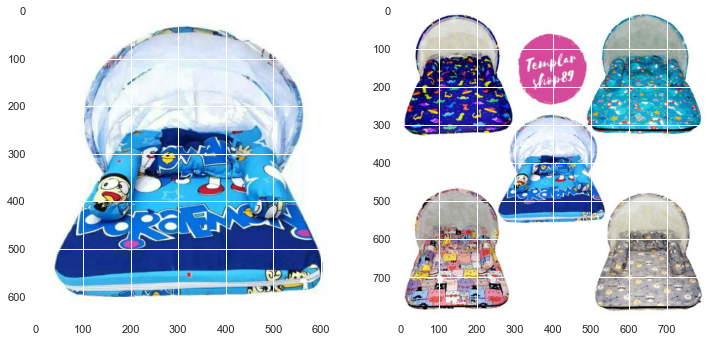

In [61]:
# displaying photos
%pylab inline
idx = np.random.randint(low=0, high=len(labels))
# getting image 
label = labels[idx]
temp = train_df[train_df.label_group == label]
display(temp)

# showing images
size = len(temp)
fig, axes = plt.subplots(nrows=int(np.ceil(size/2)), ncols=2, figsize=(12,6*int(np.ceil(size/2))))
img = []
for i in range(size):
    img.append(mpimg.imread(temp.image.iloc[i]))
    if size > 2:
        axes[i//2, i%2].imshow(img[-1])
    else:
        axes[i%2].imshow(img[-1])
plt.show()

In [62]:
img[0].shape

(640, 640, 3)

In [63]:
img[1].shape

(800, 800, 3)

In [64]:
temp.title.values

array(['Kasur Bayi Lipat Kelambu Karakter Doraemon',
       'Kasur Bayi Lipat Kelambu Set Baru Lahir Murah  bisa bayar di tempat/cod premium quality'],
      dtype=object)

In [ ]:
# Using near-duplicate text and near-duplicate image implementation ??


***
## Sentence embedding 

In [31]:
#Function so that one session can be called multiple times. 
#Useful while multiple calls need to be done for embedding. 
import tensorflow as tf
import tensorflow_hub as hub
def embed_useT(module):
    with tf.Graph().as_default():
        sentences = tf.compat.v1.placeholder(tf.string)
        embed = hub.Module(module)
        embeddings = embed(sentences)
        session = tf.compat.v1.train.MonitoredSession()
    return lambda x: session.run(embeddings, {sentences: x})
embed_fn = embed_useT(r'E:\Download\universal-sentence-encoder')

INFO:tensorflow:Saver not created because there are no variables in the graph to restore
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [32]:
messages = [
    "we are sorry for the inconvenience",
    "we are sorry for the delay",
    "we regret for your inconvenience",
    "we don't deliver to baner region in pune",
    "we will get you the best possible rate"
]
embed_fn(messages)

array([[ 0.00021284, -0.04443966,  0.03926146, ...,  0.04830161,
        -0.11913303,  0.03370819],
       [ 0.01778567, -0.05192029, -0.00792321, ..., -0.01799903,
        -0.09819182,  0.06020731],
       [-0.00748426, -0.02401579,  0.01762747, ...,  0.09334016,
        -0.11837555,  0.00603597],
       [-0.03505318, -0.01932573, -0.03248611, ...,  0.0035643 ,
        -0.08239804,  0.03887841],
       [-0.051118  , -0.0309066 ,  0.03542013, ..., -0.013439  ,
        -0.10434885, -0.03150059]], dtype=float32)

In [67]:
text_arr = train_df[(train_df.label_group == 3735637542) | (train_df.label_group ==4340963)]
text_arr

,posting_id,image,image_phash,title,label_group
32,train_188255836,E:\Download\shopee-product-matching\train_imag...,a7970cb603f419e9,Garnier Light Complete Whitening Serum Milk UV...,4340963
33,train_2087941785,E:\Download\shopee-product-matching\train_imag...,e6cb9834b694d136,GARNIER Light Complete Extra Whitening Serum M...,4340963
30068,train_3449250287,E:\Download\shopee-product-matching\train_imag...,eac0976eb167c09a,Kasur Bayi Lipat Kelambu Karakter Doraemon,3735637542
30069,train_3233948981,E:\Download\shopee-product-matching\train_imag...,9e2fcbe2e0c81c35,Kasur Bayi Lipat Kelambu Set Baru Lahir Murah ...,3735637542


In [68]:
text_arr.title

32       Garnier Light Complete Whitening Serum Milk UV...
33       GARNIER Light Complete Extra Whitening Serum M...
30068           Kasur Bayi Lipat Kelambu Karakter Doraemon
30069    Kasur Bayi Lipat Kelambu Set Baru Lahir Murah ...
Name: title, dtype: object

In [69]:
emb = embed_fn(text_arr.title.values)

In [70]:
# The output is a matrix of dimension 5*512. 
# (each sentence is a vector of size 512). Since 
# the values are normalized, the inner product 
# of encodings can be treated as a similarity matrix.

# In fact, when magnitude is normalized (all dots 
# are equal length from the origin of the graph), 
# Euclidean distance and cosine similarity will 
# return the same results.

np.inner(emb, emb)

array([[1.0000001 , 0.9741273 , 0.17891571, 0.32703602],
       [0.9741273 , 0.9999999 , 0.18847823, 0.33540705],
       [0.17891571, 0.18847823, 0.99999994, 0.42844296],
       [0.32703602, 0.33540705, 0.42844296, 1.        ]], dtype=float32)

### TF-IDF
https://towardsdatascience.com/a-laymans-guide-to-fuzzy-document-deduplication-a3b3cf9a05a7

In [ ]:
# Another transformation takes the document vectors we’ve created, called bag-of-words vectors 
# (because we’re simply counting how many words are in each document), and converting it into 
# term frequency — inverse document frequency vectors (TF-IDF). This is a very powerful 
# transformation that can help you in tasks like document classification. You discount words 
# that occur frequently across your entire corpus (the, he, her, it, etc.) and focus on rarer 
# words that occur in specific documents but not across the entire corpus, because these 
# latter words are much more likely to be meaningful.



***
### Image Feature Extraction

In [15]:
directory

'E:\\Download\\shopee-product-matching'

In [71]:
text_arr

,posting_id,image,image_phash,title,label_group
32,train_188255836,E:\Download\shopee-product-matching\train_imag...,a7970cb603f419e9,Garnier Light Complete Whitening Serum Milk UV...,4340963
33,train_2087941785,E:\Download\shopee-product-matching\train_imag...,e6cb9834b694d136,GARNIER Light Complete Extra Whitening Serum M...,4340963
30068,train_3449250287,E:\Download\shopee-product-matching\train_imag...,eac0976eb167c09a,Kasur Bayi Lipat Kelambu Karakter Doraemon,3735637542
30069,train_3233948981,E:\Download\shopee-product-matching\train_imag...,9e2fcbe2e0c81c35,Kasur Bayi Lipat Kelambu Set Baru Lahir Murah ...,3735637542


In [8]:
# using pretrained model to extract feature of an image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.preprocessing import normalize # for normalazing features 

model = VGG16(weights='imagenet', include_top=False)
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [72]:
vgg16_features = []
for i in range(len(text_arr)):
    img_path = text_arr.image.iloc[i]
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)

    vgg16_feature = model.predict(img_data)
    
    vgg16_features.append(vgg16_feature.reshape(1,-1))

# print(vgg16_feature.shape)
vgg16_features = normalize(np.array(vgg16_features).reshape(len(text_arr), -1), axis=1)

In [73]:
vgg16_features.shape

(4, 25088)

In [74]:
np.inner(vgg16_features, vgg16_features)

array([[0.9999999 , 0.7212242 , 0.15210162, 0.15637173],
       [0.7212242 , 0.99999964, 0.17154361, 0.14288528],
       [0.15210162, 0.17154361, 0.9999999 , 0.2297738 ],
       [0.15637173, 0.14288528, 0.2297738 , 1.0000004 ]], dtype=float32)

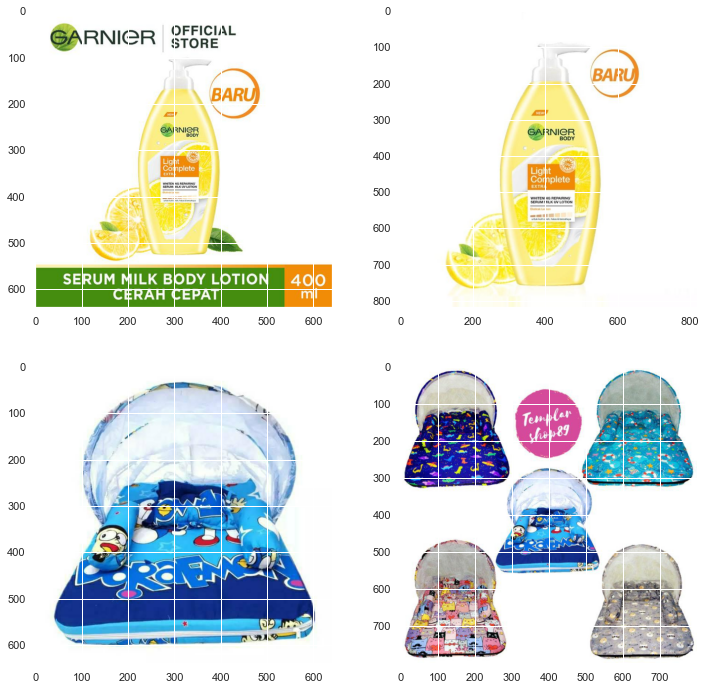

In [75]:
size = len(text_arr)
fig, axes = plt.subplots(nrows=int(np.ceil(size/2)), ncols=2, figsize=(12,6*int(np.ceil(size/2))))
img = []
for i in range(size):
    img.append(mpimg.imread(text_arr.image.iloc[i]))
    if size > 2:
        axes[i//2, i%2].imshow(img[-1])
    else:
        axes[i%2].imshow(img[-1])
plt.show()

***
## Assemble text and image embeddings
1. Using `KNeighborsClassifier` to group them based on train set, and on the prediction, if it is close to one of the group assign it, if not (close to multiple groups equally), then we make a new group for that product.
1. 

In [82]:
text_arr.iloc[0].title

'Garnier Light Complete Whitening Serum Milk UV Body Lotion Skin Care - 400 ml'

In [95]:
embed_fn([text_arr.iloc[0].title])

array([[-1.48066115e-02, -5.21085784e-03,  2.48828884e-02,
        -4.35364358e-02,  1.62613522e-02,  1.62771046e-02,
        -2.11316124e-02,  4.43385430e-02, -2.98794284e-02,
         3.77088524e-02, -9.01358575e-03,  1.55557971e-02,
         5.93586974e-02, -8.08964204e-03,  7.75011955e-03,
        -2.82184966e-02,  9.99705121e-03,  5.18000610e-02,
         1.94645133e-02,  2.48101866e-03, -2.06113216e-02,
         2.64208205e-02, -2.58206073e-02,  5.50771952e-02,
         8.09227228e-02,  7.54396766e-02,  8.71000625e-03,
         4.03401330e-02, -3.21284123e-02, -3.45918990e-04,
        -2.87727807e-02, -6.40373230e-02,  1.21155027e-02,
        -7.99384248e-03,  7.41293002e-03,  3.66407372e-02,
        -9.36836354e-04,  1.23960385e-02,  6.84648454e-02,
        -1.63362008e-02,  7.84161091e-02,  9.40849185e-02,
        -5.71524315e-02,  2.55121924e-02, -4.24125344e-02,
         4.68426533e-02,  5.09062372e-02,  4.97942965e-04,
        -2.14119861e-03,  7.01189190e-02,  4.31525940e-0

In [96]:
img_path = text_arr.image.iloc[0]
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

vgg16_feature = model.predict(img_data)

normalize(np.array(vgg16_feature).reshape(1, -1), axis=0)

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [93]:
a = embed_fn([text_arr.iloc[0].title])
a = np.append(a, normalize(np.array(vgg16_feature).reshape(1, -1), axis=0))
a

(25600,)

In [97]:
a.reshape(1,-1).shape

(1, 25600)

In [123]:
# 1. using sklearn.neighbors.KNeighborsClassifier
# Xtrain = []
# for i in range(len(train_df)):
#     # text embedding
#     text_emb = embed_fn([train_df.iloc[i].title])
    
#     # image embedding
#     img_path = train_df.image.iloc[i]
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_data = image.img_to_array(img)
#     img_data = np.expand_dims(img_data, axis=0)
#     img_data = preprocess_input(img_data)

#     vgg16_feature = model.predict(img_data)
    
#     # combine them 
#     curr_emb = np.append(text_emb, normalize(np.array(vgg16_feature).reshape(1, -1), axis=0))
    
#     # put this embedding into the train array
#     Xtrain.append(curr_emb)

# Xtrain = np.array(Xtrain)

In [240]:
np.savetxt(r'E:\Download\shopee-product-matching\emb_text_sentence_imag_vgg16_numpy.txt', Xtrain, fmt='%f')

In [125]:
# the above cell takes awhile to run
# import pickle 
# object1 = Xtrain
# filehandler = open(r'E:\Download\shopee-product-matching\emb_text_sentence_imag_vgg16.txt', 'wb') 
# pickle.dump(object1, filehandler)

# loading
# filehandler = open(r'E:\Download\shopee-product-matching\emb_text_sentence_imag_vgg16.txt', 'r') 
# Xtrain = pickle.load(filehandler)

In [241]:
Xtrain.shape

(34250, 25600)

In [132]:
Xtrain[215][512:]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [137]:
img_path = train_df.image.iloc[215]
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)
vgg16_feature = model.predict(img_data)

In [138]:
all(Xtrain[215][512:] == normalize(np.array(vgg16_feature).reshape(1, -1), axis=0))

True

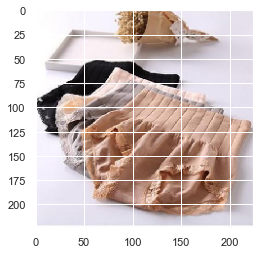

In [140]:
plt.imshow(img)

In [142]:
ytrain = train_df.label_group.values
ytrain

array([    258047,     258047,     258047, ..., 4294197112, 4294197112,
       4294197112], dtype=int64)

In [143]:
Xtrain.shape, ytrain.shape

((34250, 25600), (34250,))

In [166]:
# training kneighborclassifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrain, ytrain)

KNeighborsClassifier()

In [171]:
i = np.random.randint(low=0, high=len(train_df))
print('iloc: ', i)
print('Predict: ', neigh.predict([Xtrain[i]]))
print('Actual: ', ytrain[i])

iloc:  25838
Predict:  [3205175747]
Actual:  3205175747


In [172]:
pred = neigh.predict(Xtrain)

In [188]:
print('Accuracy: ', (pred == ytrain).mean())

Accuracy:  0.5441167883211678


### Using PCA
We had used all $25088$ features of image embedding + $512$ features of title embedding, but the concern should be raised that image features overwhelm title features. Sometimes we need to also look at title to decide whether or not a pair should have been classified as the same sale positng, so I am going to use `PCA` to reduce number of iamge features down.

In [196]:
# the above cell takes awhile to run
## pca.fit(Xtrain[512:])
# mixed features were used, but only from sample 512th forward !!


# import pickle 
# object1 = pca
# filehandler = open(r'E:\Download\shopee-product-matching\v1_emb_512th_sampleForaward.txt', 'wb') 
# pickle.dump(object1, filehandler)
# filehandler.close()

# loading
# filehandler = open(r'E:\Download\shopee-product-matching\v1_emb_512th_sampleForaward.txt', 'r') 
# pca = pickle.load(filehandler)
# filehandler.close()

In [193]:
# PCA on the image features, so that it won't dominate text features too much
Xtrain[:,512:].shape

(34250, 25088)

In [202]:
# lets shrink image embeding features to that similar size to the title embedding
from sklearn.decomposition import PCA
pca = PCA(10000)
pca.fit(Xtrain[:,512:].T)

PCA(n_components=10000)

In [203]:
pca.explained_variance_ratio_.sum()

0.9347461

In [204]:
# the above cell takes awhile to run
# import pickle 
# object1 = pca
# filehandler = open(r'E:\Download\shopee-product-matching\v1_emb_imag_feature.txt', 'wb') 
# pickle.dump(object1, filehandler)
# filehandler.close()

# loading
# filehandler = open(r'E:\Download\shopee-product-matching\v1_emb_imag_feature.txt', 'r') 
# pca = pickle.load(filehandler)
# filehandler.close()

In [208]:
# testing np.append function
t1 = np.array([[1,2,3],
               [2,3,4]
              ])

t2 = np.array([[1,2,3],
               [2,3,4]
              ])
np.append(t1, t2, axis=1)

array([[1, 2, 3, 1, 2, 3],
       [2, 3, 4, 2, 3, 4]])

In [206]:
pca.components_.T.shape

(34250, 10000)

In [198]:
Xtrain[:,:512].shape

(34250, 512)

In [207]:
Xtrain2 = np.append(Xtrain[:,:512], pca.components_.T, axis=1)
Xtrain2.shape

(34250, 10512)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrain2, ytrain)

KNeighborsClassifier()

In [224]:
i = np.random.randint(low=0, high=len(train_df))
print('iloc: ', i)
print('Predict: ', neigh.predict([Xtrain2[i]]))
print('Actual: ', ytrain[i])

iloc:  25264
Predict:  [3141936314]
Actual:  3141936314


In [225]:
pred2 = neigh.predict(Xtrain2)

In [226]:
print('Accuracy: ', (pred2 == ytrain).mean())

Accuracy:  0.576


In [230]:
for size in 512 + 2**np.array([9, 10, 11, 12, 13]):
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(Xtrain2[:, :size], ytrain)
    pred_temp = neigh.predict(Xtrain2[:, :size])
    print('Size: ', size, '. Accuracy: ', (pred_temp == ytrain).mean())

Size:  1024 . Accuracy:  0.5659562043795621
Size:  1536 . Accuracy:  0.5789781021897811
Size:  2560 . Accuracy:  0.5978102189781022
Size:  4608 . Accuracy:  0.6129051094890511
Size:  8704 . Accuracy:  0.596


![](trend_knn.png)
> $y = -2E-09x^2 + 3E-05x + 0.5435$ <br>
1024	0.565956204
1536	0.578978102
2560	0.597810219
4608	0.612905109
8704	0.596


In [232]:
for size in [7500-100, 7500, 7500+100]:
    neigh = KNeighborsClassifier(n_neighbors=5)
    neigh.fit(Xtrain2[:, :size], ytrain)
    pred_temp = neigh.predict(Xtrain2[:, :size])
    print('Size: ', size, '. Accuracy: ', (pred_temp == ytrain).mean())

Size:  7400 . Accuracy:  0.6053722627737226
Size:  7500 . Accuracy:  0.6047007299270073


KeyboardInterrupt: 

### RandomForestClassifier

In [237]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(Xtrain2[:, :4608], ytrain)
rf_predictions = rf_classifier.predict(Xtrain2[:, :4608])

KeyboardInterrupt: 

In [ ]:
print('Accuracy: ', (rf_predictions == ytrain).mean())

#### DISCUSSION:
> There might be too many features to train the tree within acceptable amount of time.

## Multi-Class Classification with the Keras Deep Learning Library
https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/<br>
https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc

In [ ]:
# start off with single hidden layer network
from sklearn.neural_network import MLPClassifier

In [233]:
snn_classifier = MLPClassifier() # hidden_layer_sizestuple, length = n_layers - 2, default=(100,)
snn_classifier.fit(Xtrain2[:, :4608], ytrain)
snn_predictions = snn_classifier.predict(Xtrain2[:, :4608])

C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [234]:
print('Accuracy: ', (snn_predictions == ytrain).mean())

Accuracy:  0.999036496350365


In [235]:
dnn_classifier = MLPClassifier(hidden_layer_sizes = [100]*5)
dnn_classifier.fit(Xtrain2[:, :4608], ytrain)
dnn_predictions = dnn_classifier.predict(Xtrain2[:, :4608])

In [236]:
print('Accuracy: ', (dnn_predictions == ytrain).mean())

Accuracy:  0.9233284671532846


In [ ]:
# they are overfitting, so we need to do train-test split
# startt off with Gridsearch CV, so the test group can work as val group

In [246]:
# number of count for each label group
sample_count = train_df.groupby('label_group')['title'].count()
sample_count = sample_count[sample_count > 3] # take only those with more than 2 sampels
sample_count

label_group
645628        12
9079959        8
12491276       4
15519389       5
16448490       8
              ..
4290248491     4
4291905065     5
4292006141     4
4292520070    11
4294197112     4
Name: title, Length: 2256, dtype: int64

In [247]:
# getting all the label which has more than 2 samples
# and take 1/3 of them to be test data
test_index = []
for idx in sample_count.index:
    temp = train_df[train_df.label_group == idx].sample(sample_count[idx]//3)
    test_index.extend(list(temp.index))

In [248]:
train_df.loc[set(train_df.index)-set(test_index)].shape

(30088, 5)

In [249]:
train_df.loc[test_index].shape

(4162, 5)

In [251]:
train_index = train_df.loc[set(train_df.index)-set(test_index)].index

In [252]:
Xtrain3 = Xtrain2[train_index]
ytrain3 = ytrain[train_index]
Xtrain3.shape, ytrain3.shape

((30088, 10512), (30088,))

In [253]:
Xtest3 = Xtrain2[test_index]
ytest3 = ytrain[test_index]
Xtest3.shape, ytest3.shape

((4162, 10512), (4162,))

![](it_1_MLPclassifier.png)
> The above code was run on other notebook, the result shows that 1 hidden layer seems to perform better, so we will go gridsearch on 1 hidden layer model.

In [255]:
mlp_gs = MLPClassifier()
parameter_space = {
    'hidden_layer_sizes': [(16,) , (128,), (256,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=8, cv=3, verbose=2.5)
clf.fit(Xtrain3[:, :4608], ytrain3) # X is train samples and y is the corresponding labels

Fitting 3 folds for each of 6 candidates, totalling 18 fits


C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan 0.41917048]
  warnings.warn(


GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=8,
             param_grid={'hidden_layer_sizes': [(16,), (128,), (256,)],
                         'learning_rate': ['constant', 'adaptive']},
             verbose=2.5)

In [264]:
pd.DataFrame.from_dict(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,933.924419,1317.764467,0.667404,0.943851,"(16,)",constant,"{'hidden_layer_sizes': (16,), 'learning_rate':...",NaN,0.266427,NaN,NaN,NaN,2
1,2.118390,0.044618,0.000000,0.000000,"(16,)",adaptive,"{'hidden_layer_sizes': (16,), 'learning_rate':...",NaN,NaN,NaN,NaN,NaN,3
2,705.364276,992.922135,0.938430,1.327141,"(128,)",constant,"{'hidden_layer_sizes': (128,), 'learning_rate'...",NaN,0.406421,NaN,NaN,NaN,4
3,4.373231,0.012578,0.000000,0.000000,"(128,)",adaptive,"{'hidden_layer_sizes': (128,), 'learning_rate'...",NaN,NaN,NaN,NaN,NaN,5
4,821.296954,1155.291291,0.824699,1.166300,"(256,)",constant,"{'hidden_layer_sizes': (256,), 'learning_rate'...",NaN,NaN,0.416991,NaN,NaN,6
5,2444.369480,24.994307,2.665065,0.315856,"(256,)",adaptive,"{'hidden_layer_sizes': (256,), 'learning_rate'...",0.417647,0.418686,0.421179,0.41917,0.001482,1


In [263]:
clf.best_score_

0.41917048402769225

In [257]:
y_true, y_pred = ytest3 , clf.predict(Xtest3[:, :4608])
print('Accuracy: ', (y_true == y_pred).mean())

Accuracy:  0.6210956271023547


In [ ]:
# seems like the bigger hidden layer with adaptive learning rate performs quite well

In [265]:
snn_classifier512 = MLPClassifier(hidden_layer_sizes=(512,)) # hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
snn_classifier512.fit(Xtrain3[:, :4608], ytrain3)

MLPClassifier(hidden_layer_sizes=(512,))

In [266]:
snn_predictions = snn_classifier512.predict(Xtest3[:, :4608])
print('Accuracy: ', (snn_predictions == ytest3).mean())

Accuracy:  0.6525708793849111


In [267]:
snn_classifier1024 = MLPClassifier(hidden_layer_sizes=(1024,)) # hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
snn_classifier1024.fit(Xtrain3[:, :4608], ytrain3)

MLPClassifier(hidden_layer_sizes=(1024,))

In [268]:
snn_predictions = snn_classifier1024.predict(Xtest3[:, :4608])
print('Accuracy: ', (snn_predictions == ytest3).mean())

Accuracy:  0.6612205670350793


In [269]:
snn_classifier2048 = MLPClassifier(hidden_layer_sizes=(2048,)) # hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
snn_classifier2048.fit(Xtrain3[:, :4608], ytrain3)

MLPClassifier(hidden_layer_sizes=(2048,))

In [270]:
snn_predictions = snn_classifier2048.predict(Xtest3[:, :4608])
print('Accuracy: ', (snn_predictions == ytest3).mean())

Accuracy:  0.6749159058145122


In [271]:
snn_classifier4096 = MLPClassifier(hidden_layer_sizes=(4096,)) # hidden_layer_sizes tuple, length = n_layers - 2, default=(100,)
snn_classifier4096.fit(Xtrain3[:, :4608], ytrain3)

MLPClassifier(hidden_layer_sizes=(4096,))

In [272]:
snn_predictions = snn_classifier4096.predict(Xtest3[:, :4608])
print('Accuracy: ', (snn_predictions == ytest3).mean())

Accuracy:  0.6657856799615569


#### DISCUSSION:
> This is probably the best we can get with model using Google Sentence Encoder, VGG16 image feature extractor, PCA to generate feature representation of each post, along with `MLPClassifier` as the classifier layer. The best accuracy reported at $67.5\%$ with `MLPClassifier(hidden_layer_sizes=(2048,))`